# 1. Data Exploration

 ## 1.1. Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

## 1.2 Loading Data

In [25]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [26]:
# Display a sample of the dataset
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
11735,11736,MAR,39.0,1165,0x0C17084F4D33AE19CD45416F10ABE2FB3FF18CA1004C...,0x89220A2E484FAE4E59544520AAEB92B25A10C4C9A240...,105,428.4,13.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
46673,46674,SRB,34.0,602,0x9140BE564B326E995D0F606A43052D05182CC6AEE993...,0xD5363D80A76209505CC66EFE56A74593C73882922BD2...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
34143,34144,DNK,41.0,799,0xA390C55EE4998DD9C4A2A40A06A6905095C0FCB104F8...,0x173DF4875A13E72EA43AFCF00991ABD84880D11DC926...,158,534.0,68.0,0,0,1,12,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
21109,21110,FRA,36.0,1007,0x6F366AACB9BC36DF548A218B457FFDA6F244594F7020...,0x96CD00E56E7EEEBFDAFD7C07717993CC07651FDE9351...,0,53.9,18.3,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
22536,22537,FRA,48.0,972,0x5F0BB3A4BB76E8467F48D1CF430ED689529B9CD1CA13...,0x1BFC15CA2DCE7EC28B5912D3ED69740BE84C54844DFA...,32,552.6,148.0,0,0,1,18,6,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1


In [27]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


We will drop NameHash and DocIDHash, as this are merely identification features, not worth keeping for clustering.

In [28]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

We will create a feature named TotalRevenue, so we can filter customers(people who have spent) from accounts registered(people who haven't spent)

In [29]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [30]:
# Check how many customers have a TotalRevenue of 0 and how many have bigger than zero
nospendingdata = data[data['TotalRevenue']==0].shape[0]
print(f'There are {nospendingdata} customers with no spending data, which is {nospendingdata/data.shape[0]*100:.2f}% of the dataset.')

There are 33537 customers with no spending data, which is 30.02% of the dataset.


Since around 30% of the dataset consists of accounts with zero spending, we will use TotalRevenue to filter the dataset for customers only - accounts that have spent at the hotel. <br>
This is the dataframe we will be using moving forward.

In [31]:
# Create a dataframe with only customers who have spent
customers = data[data['TotalRevenue']>0]

In [32]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,75239.0,48.064953,15.196650,-10.0,37.0,48.00,58.0,115.00
DaysSinceCreation,78196.0,692.123344,376.877785,36.0,378.0,711.50,1017.0,1385.00
AverageLeadTime,78196.0,86.756867,89.842440,-1.0,16.0,57.00,133.0,588.00
LodgingRevenue,78196.0,405.590508,394.984427,0.0,187.0,311.32,486.0,21781.00
OtherRevenue,78196.0,92.424210,138.774144,0.0,28.0,58.00,114.5,8859.25
BookingsCanceled,78196.0,0.003044,0.094431,0.0,0.0,0.00,0.0,15.00
BookingsNoShowed,78196.0,0.000857,0.033726,0.0,0.0,0.00,0.0,3.00
BookingsCheckedIn,78196.0,1.048800,0.657224,0.0,1.0,1.00,1.0,76.00
PersonsNights,78196.0,6.171607,4.388354,0.0,3.0,6.00,8.0,116.00
RoomNights,78196.0,3.140774,2.149613,0.0,2.0,3.00,4.0,185.00


# EDA


## Age
`Age:` <br>
Has missing values; <br>
Average age is 45 years; <br>
Min is -10; <br>
Max is 115.

Actionables: Deal with missing values, plot age distribution, check cases where age is negative, check cases where age is above 100. <br>


**TO DO: Create bins with age segments.**

Age wil be feature 1 of demographic clustering and there will be three groups:
- Minors: under 18;
- Young: 18-40;
- Old: <40

In [33]:
# Check number of missing values in age
customers['Age'].isnull().sum()
print(f'There are {customers["Age"].isnull().sum()} missing values in the Age column, which correspond to {customers["Age"].isnull().sum()/len(customers)*100:.2f}% of the data.')

There are 2957 missing values in the Age column, which correspond to 3.78% of the data.


In [34]:
# Check age correlation with other columns 
customers.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.247354
OtherRevenue            0.064256
DaysSinceCreation       0.052999
SRTwinBed               0.045045
SRLowFloor              0.017310
SRNearElevator          0.014700
SRQuietRoom             0.013636
BookingsCheckedIn       0.010531
SRMediumFloor           0.009097
SRAwayFromElevator      0.008477
SRShower                0.008204
BookingsCanceled        0.008093
BookingsNoShowed        0.005728
SRAccessibleRoom        0.002354
RoomNights              0.001745
SRNoAlcoholInMiniBar   -0.006346
PersonsNights          -0.018445
SRBathtub              -0.020232
SRKingSizeBed          -0.022763
SRHighFloor            -0.024425
TotalRevenue           -0.041267
SRCrib                 -0.071726
LodgingRevenue         -0.071987
Name: Age, dtype: float64

Our goal by checking this correlation was to see if any variable was correlated with age enough, that we could use in a predictive model to predict age. Since the highest correlated variable is 26% correlation, we discarded this idea, and just assumed to input median.

In [35]:
# Check cases where age is negative
print(f'There are {len(customers[customers['Age'] < 0])} cases where age is negative')
customers[customers['Age'] < 0]

There are 12 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5128,FRA,-8.0,1271,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,107.30
6752,GBR,-10.0,1243,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,468.00
8361,DEU,-6.0,1217,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0,235.00
8629,NLD,-9.0,1213,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,448.60
9920,DZA,-5.0,1193,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,168.43
10663,DEU,-9.0,1181,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0,239.00
10695,DEU,-9.0,1181,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0,185.50
10756,PRT,-5.0,1181,292,128.00,55.00,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0,183.00
14322,PRT,-9.0,1127,346,128.00,53.00,0,0,1,2,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,181.00


All rows with negative values for age have in common DistributionChannel = 'Travel Agent/Operator', and are between [-10, -5].


In [36]:
# Check cases where age is above 100
print(f'There are {len(customers[customers['Age'] > 90])} cases where age is above 90 years old, which corresponds to {len(customers[customers["Age"] > 90])/len(customers)*100:.2f}% of the data.')
customers[customers['Age'] > 90]

There are 13 cases where age is above 90 years old, which corresponds to 0.02% of the data.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.00,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,104.50
7425,DEU,92.0,1231,0,535.00,170.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,705.00
18912,BEL,111.0,1058,215,140.00,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0,304.80
19867,PRT,93.0,1039,18,68.00,14.0,0,0,1,2,1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00
25590,DEU,114.0,924,7,492.00,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0,568.40
39783,DEU,91.0,720,155,119.00,7.0,0,0,1,1,1,GDS Systems,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,126.00
44525,DEU,114.0,627,7,234.00,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,268.50
45089,PRT,115.0,620,2,266.00,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0,309.00
62694,NOR,97.0,467,87,734.00,24.0,0,0,1,12,6,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,758.00


Since only 0.02% of the data is above 90 years of age, we will treat this customers as outliers, and drop them to keep the integrity of the statistics.

In [37]:
# Drop rows where age is above 90
customers = customers[customers['Age'] <= 90]

In [38]:
# Turn the rows with age below 0 to NaN
customers.loc[customers['Age'] < 0, 'Age'] = np.nan

In [39]:
# Fill missing values with median
customers['Age'].fillna(customers['Age'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_3343/4267279922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Age'].fillna(customers['Age'].median(), inplace=True)


In [40]:
# check for missing values in age
print(f'There are {customers["Age"].isnull().sum()} missing values left in Age column.')

There are 0 missing values left in Age column.


## TotalRevenue

TotalRevenue wil be feature 2 of demographic clustering and there will be three groups:
- Low Spenders: under the 33th quantile;
- Spenders: from 33th quantile to the 66th;
- Top spenders : more than the the 66th quantile

In [41]:
# check missing values in total revenue
print(f'There are {customers["TotalRevenue"].isnull().sum()} missing values in TotalRevenue column.')

There are 0 missing values in TotalRevenue column.


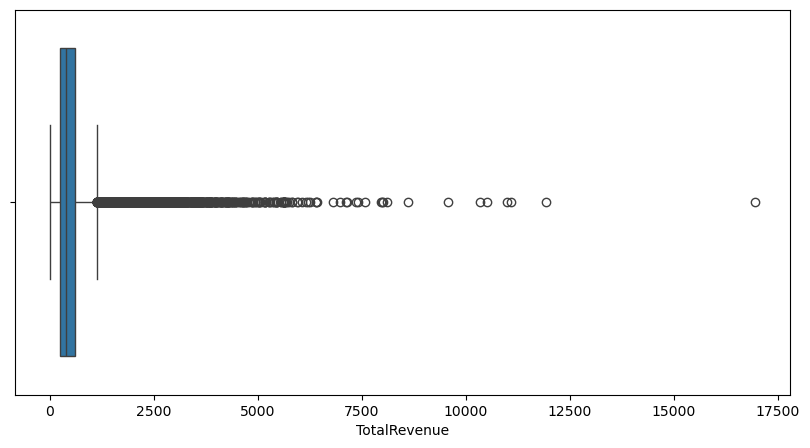

In [42]:
# check outliers in total revenue with a horizontal boxplot
plt.figure(figsize=(10,5))
sns.boxplot(customers['TotalRevenue'], orient='h')
plt.show()

In [43]:
# get the 99th percentile of TotalRevenue
percentile_99 = customers['TotalRevenue'].quantile(0.99)
print(f'Only 1% of customers spend more than {percentile_99:.2f}.')

Only 1% of customers spend more than 2347.38.


In [44]:
# How many values are above 10000

print(f'There are only {customers[customers["TotalRevenue"] > 10000].shape[0]} values above 10000 in TotalRevenue column, which represent {round(customers[customers["TotalRevenue"] > 10000].shape[0]/customers.shape[0]*100,2)}% of customers.')

There are only 6 values above 10000 in TotalRevenue column, which represent 0.01% of customers.


We will drop customers who have spent over 10.000, as they are considered outliers.

In [45]:
# Drop rows with TotalRevenue above 10000
customers = customers[customers['TotalRevenue'] <= 10000]

In [46]:
#Get quantile 0.33 and 0.66

quantile_33 = customers['TotalRevenue'].quantile(0.33)
quantile_66 = customers['TotalRevenue'].quantile(0.66)
print(f'The 33rd percentile is {quantile_33:.2f} and the 66th percentile is {quantile_66:.2f}.')

The 33rd percentile is 294.00 and the 66th percentile is 507.38.


## BookingsCheckedIn

We will have three groups:
People who used our services (bar, spa, etc) but didn't stay at the hotel (BookingsCheckedIn)=0 <br>
One time travellers BookingsCheckedIn=1 <br>
Recurrent travellers BookingsCheckedIn>1

In [48]:
# Check for custoemrs with BookingsCheckedIn=0
print(f'There are {customers[customers["BookingsCheckedIn"]==0].shape[0]} customers with BookingsCheckedIn=0, which is {customers[customers["BookingsCheckedIn"]==0].shape[0]/customers.shape[0]*100:.2f}% of the data.')

There are 0 customers with BookingsCheckedIn=0, which is 0.00% of the data.


### Features for demographic clustering

Objective: Identify customer groups based on who they are (age, nationality, loyalty, and spending habits).

Feature 1 groups (Age): Young(18-35), middle aged (36-55()) or old(over 56). <br>
Feature 2 groups (TotalRevenue): Very high spender(the top 10%) , High spender(from average spent(50%) to the top 10%), budget traveler (below average spent (lowest 50%)). <br>
Feature 3 groups (BookingsCheckedIn): one time stop(=1), infrequent(1-3), frequent (<3)  <br>
Feature 4 groups (PeoplePerRoom = PersonsNights/RoomNights): solo traveler(1), small group(2-5), big group (<5).